In [1]:
from collections import defaultdict
from random import random, randint
from glob import glob
from math import log
import argparse
from sklearn.utils import class_weight
import json
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import pylab as pl
from pandas import *
from nltk.tokenize import TreebankWordTokenizer
kTOKENIZER = TreebankWordTokenizer()
kDOC_NORMALIZER = True
from nltk.collocations import *
import time
import string
from gensim.corpora.dictionary import Dictionary
from gensim.models.wrappers import LdaMallet
from gensim.models import LdaModel
import os

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import os
import string
import nltk
from nltk import word_tokenize
from scipy.spatial.distance import cosine
from nltk.corpus import stopwords
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS
%matplotlib inline
from os import listdir
from os.path import isfile, join
from wordcloud import WordCloud
import gensim
from sklearn.cluster import KMeans
from collections import Counter 
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud
import gensim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
nlp = spacy.load('en')
stop_words_list = list(spacy.lang.en.STOP_WORDS)
punctuation_list = list(string.punctuation)
punctuation_list.extend('\r')
punctuation_list.extend('\n')
punctuation_list.extend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

In [0]:
def cleaning(element):
    final_list = []
    """ Clean up text. Tokenize, lowercase, and remove punctuation and stopwords """
    #print("Running cleaner")
    # Remove punctuation, symbols (#) and stopwords
    element = str(element).lower()
    new_string = ''
    for char in element:
        if char not in punctuation_list:
            new_string += char
    all_wrds = new_string.split(" ")
    for word in all_wrds:
        if word not in stop_words_list:
            final_list.append(word)
    final_string = ' '.join(final_list)
    return final_string

In [0]:
master= []
def tokenize(str_arg):
    words = str_arg.split()
    return words

def append(row):
    master.append(row)   

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/Shared drives/Mastery Course/Code/train_sent_emo.csv')
df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"


In [7]:
df = df.dropna()
df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"


In [8]:
df['cleaned_Utterance'] = df['Utterance'].apply(cleaning)
df['tokens'] = df['cleaned_Utterance'].apply(tokenize)
df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,cleaned_Utterance,tokens
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731",point person companys transition kl gr system,"[point, person, companys, transition, kl, gr,..."
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442",mustve hands,"[mustve, hands]"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389",,[]
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572",lets talk little bit duties,"[lets, talk, little, bit, duties]"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917",duties right,"[duties, right]"


In [9]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
sid = SentimentIntensityAnalyzer()
def sentiment_score(row):
    try:
        return sid.polarity_scores(text = row)
    except:
        print(row)

In [11]:
df['scores'] = df['Utterance'].apply(sentiment_score)
# df['cleaned_Utterance'] = df['cleaned_Utterance'].apply(sentiment_score)
df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,cleaned_Utterance,tokens,scores
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731",point person companys transition kl gr system,"[point, person, companys, transition, kl, gr,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442",mustve hands,"[mustve, hands]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389",,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572",lets talk little bit duties,"[lets, talk, little, bit, duties]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917",duties right,"[duties, right]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


### Using Vader Sentiment Analyser

In [0]:
def final_score(element):
    try:
        if element['pos'] == 1:
            return 'positive'
        if element['neg'] == 1:
            return 'negative'
        if element['neu'] == 1:
            return 'neutral'
    except:
        return None
    

In [0]:
def sentiment_mapping(element):
    try:
        if element == 'positive':
            return 1
        if element == 'negative':
            return 2
        if element =='neutral':
            return 3
    except:
        return 0
    

In [14]:
df['pred_sentiment'] = df['scores'].apply(final_score)
df = df.dropna()
df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,cleaned_Utterance,tokens,scores,pred_sentiment
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731",point person companys transition kl gr system,"[point, person, companys, transition, kl, gr,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442",mustve hands,"[mustve, hands]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389",,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572",lets talk little bit duties,"[lets, talk, little, bit, duties]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917",duties right,"[duties, right]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral


In [15]:
df['num_pred_sentiment'] = df['pred_sentiment'].apply(sentiment_mapping)
df['num_actual_sentiment'] = df['Sentiment'].apply(sentiment_mapping)
df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,cleaned_Utterance,tokens,scores,pred_sentiment,num_pred_sentiment,num_actual_sentiment
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731",point person companys transition kl gr system,"[point, person, companys, transition, kl, gr,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,3,3
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442",mustve hands,"[mustve, hands]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,3,3
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389",,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,3,3
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572",lets talk little bit duties,"[lets, talk, little, bit, duties]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,3,3
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917",duties right,"[duties, right]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,3,1


In [16]:
df[df["num_actual_sentiment"] != 3].sample(5)

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,cleaned_Utterance,tokens,scores,pred_sentiment,num_pred_sentiment,num_actual_sentiment
3122,3296,Oh really?! Then how come all your stuff is in...,Rachel,surprise,negative,329,5,6,6,"00:13:15,628","00:13:18,671",oh come stuff box,"[oh, come, stuff, box]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,3,2
7230,7640,Oh! Someone's a little cranky today cuz they h...,Janice,anger,negative,768,3,9,21,"00:14:02,925","00:14:10,181",oh someones little cranky today cuz cup oh...,"[oh, someones, little, cranky, today, cuz, cup...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,3,2
9218,9677,I knew it!,Ross,surprise,negative,963,1,3,19,"0:12:48,726","0:12:49,310",knew,[knew],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,3,2
5886,6220,"So you might say, the ring is irreplaceable?",Chandler,surprise,positive,623,16,4,22,"00:12:53,147","00:12:57,108",ring irreplaceable,"[ring, irreplaceable]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,3,1
899,945,Done!,Joanna,joy,positive,94,13,4,9,"0:12:18,779","0:12:19,983",,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,3,1


In [0]:
precision = precision_score(df.num_actual_sentiment.astype(int), df.num_pred_sentiment.astype(int), average="micro")
f1 = f1_score(df.num_actual_sentiment.astype(int), df.num_pred_sentiment.astype(int), average="micro")
recall = recall_score(df.num_actual_sentiment.astype(int), df.num_pred_sentiment.astype(int), average="micro")
accuracy = accuracy_score(df.num_actual_sentiment.astype(int), df.num_pred_sentiment.astype(int))

In [18]:
print('precision_score:', precision)
print('f1_score:', f1)
print('recall_score:', recall)
print ('accuracy_score:', accuracy)


precision_score: 0.49085365853658536
f1_score: 0.49085365853658536
recall_score: 0.49085365853658536
accuracy_score: 0.49085365853658536


In [0]:
X = df["num_pred_sentiment"]
Y = df["num_actual_sentiment"]

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42, stratify=Y)

In [21]:
# Combined report with all above metrics
from sklearn.metrics import classification_report
print(classification_report(X_test.astype(int), Y_test.astype(int), target_names=['positive', 'negative', 'neutral']))

              precision    recall  f1-score   support

    positive       0.03      0.11      0.04        28
    negative       0.03      0.44      0.06         9
     neutral       0.90      0.50      0.64       455

    accuracy                           0.48       492
   macro avg       0.32      0.35      0.25       492
weighted avg       0.83      0.48      0.60       492



#### Times

In [0]:
def getSeconds(row):
    start = datetime.strptime(row["StartTime"], "%H:%M:%S,%f")
    end = datetime.strptime(row["EndTime"], "%H:%M:%S,%f")
    diff = end - start
    return diff.total_seconds()

In [23]:
df["duration"] = df.apply(getSeconds, axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,cleaned_Utterance,tokens,scores,pred_sentiment,num_pred_sentiment,num_actual_sentiment,duration
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731",point person companys transition kl gr system,"[point, person, companys, transition, kl, gr,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,3,3,5.672
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442",mustve hands,"[mustve, hands]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,3,3,1.502
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389",,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,3,3,2.947
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572",lets talk little bit duties,"[lets, talk, little, bit, duties]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,3,3,2.752
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917",duties right,"[duties, right]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,3,1,6.465


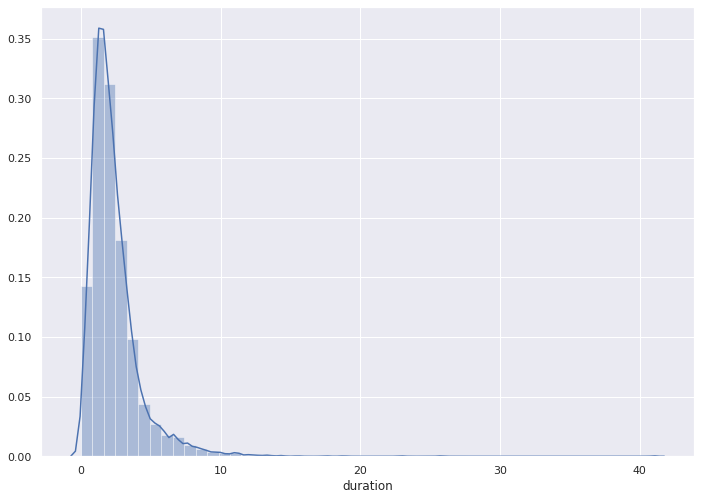

In [25]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df["duration"])

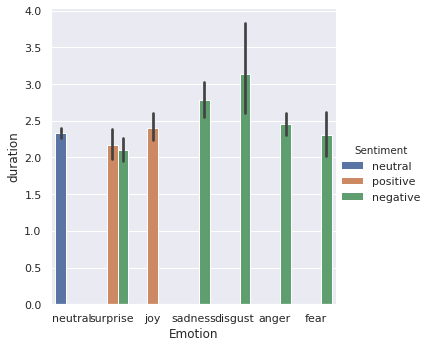

In [26]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot(x="Emotion", y="duration", hue="Sentiment", kind="bar", data=df);

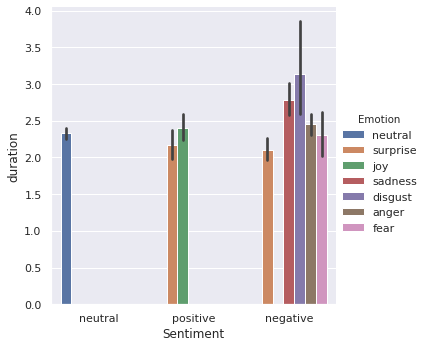

In [27]:
sns.catplot(x="Sentiment", y="duration", hue="Emotion", kind="bar", data=df);

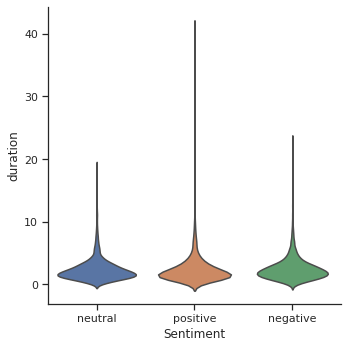

In [60]:

g = sns.catplot(x="Sentiment", y="duration", kind="violin", inner=None, data=df)
g.savefig("/content/drive/Shared drives/Mastery Course/Code/Figures/fig4.pdf", dpi=300)


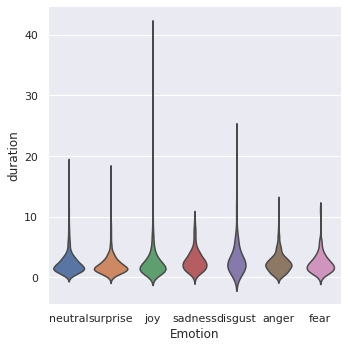

In [61]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.catplot(x="Emotion", y="duration", kind="violin", inner=None, data=df)
g.savefig("/content/drive/Shared drives/Mastery Course/Code/Figures/fig5.pdf", dpi=300)


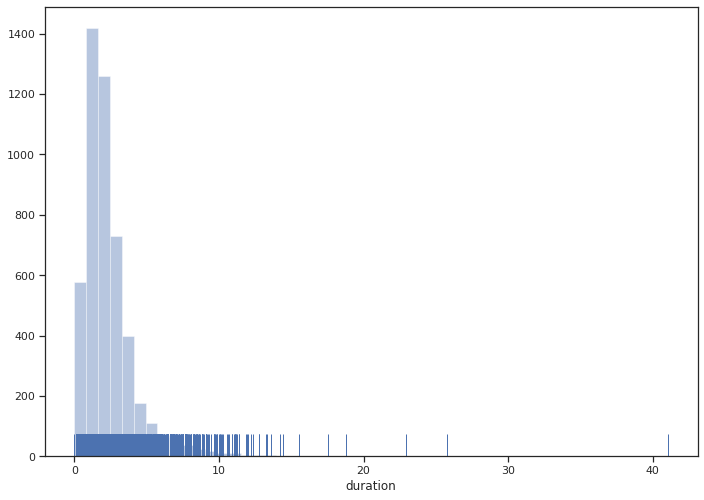

In [53]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g = sns.distplot(df["duration"], kde=False, rug=True).get_figure();
g.savefig("/content/drive/Shared drives/Mastery Course/Code/Figures/fig3.pdf", dpi=300)

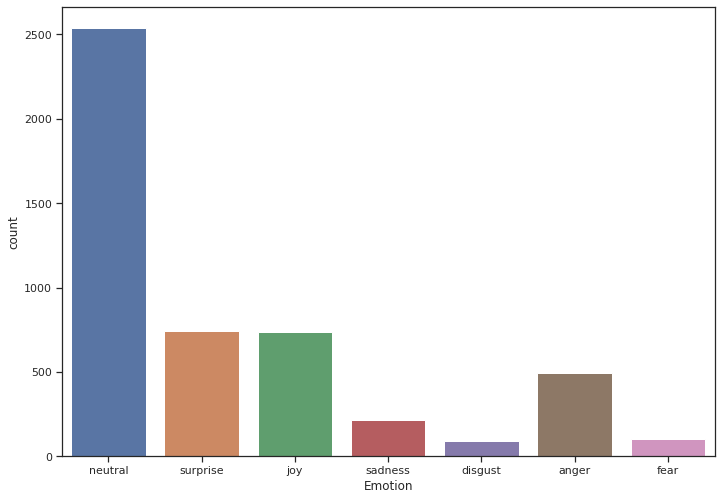

In [51]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g = sns.countplot(df["Emotion"]).get_figure();
g.savefig("/content/drive/Shared drives/Mastery Course/Code/Figures/fig1.pdf", dpi=300)

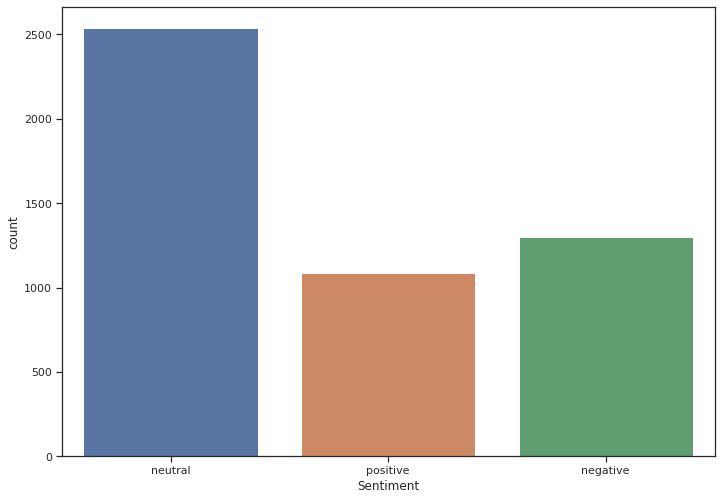

In [52]:
# fig = plt.figure(figsize=(15, 10))
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g = sns.countplot(df["Sentiment"]).get_figure();
g.savefig("/content/drive/Shared drives/Mastery Course/Code/Figures/fig2.pdf", dpi=300)

AttributeError: ignored

In [0]:
# #Exporing to CSV
# df.to_csv(r'sentiment_pred.csv')

#### **Without class weights** - Logistic Regression

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
X = df['cleaned_Utterance']
Y = df['Sentiment']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42, stratify=Y)

In [35]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
clf = LogisticRegression().fit(X_train_counts, Y_train)
X_test_counts = count_vect.transform(X_test)
Y_pred = clf.predict(X_test_counts)
accuracy = accuracy_score(np.array(Y_test), Y_pred)
# Combined report with all above metrics
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

    negative       0.43      0.22      0.29       130
     neutral       0.57      0.86      0.68       254
    positive       0.42      0.17      0.24       108

    accuracy                           0.54       492
   macro avg       0.47      0.41      0.40       492
weighted avg       0.50      0.54      0.48       492



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### **With class weights** - Logistic Regression

In [36]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
clf = LogisticRegression(class_weight='balanced').fit(X_train_counts, Y_train)
X_test_counts = count_vect.transform(X_test)
Y_pred = clf.predict(X_test_counts)
accuracy = accuracy_score(np.array(Y_test), Y_pred)
# Combined report with all above metrics
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

    negative       0.40      0.34      0.37       130
     neutral       0.59      0.64      0.62       254
    positive       0.37      0.37      0.37       108

    accuracy                           0.50       492
   macro avg       0.46      0.45      0.45       492
weighted avg       0.49      0.50      0.50       492



#### **Without class weights** - Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
clf = RandomForestClassifier().fit(X_train_counts, Y_train)
X_test_counts = count_vect.transform(X_test)
Y_pred = clf.predict(X_test_counts)
accuracy = accuracy_score(np.array(Y_test), Y_pred)
# Combined report with all above metrics
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

    negative       0.34      0.18      0.23       130
     neutral       0.55      0.83      0.66       254
    positive       0.28      0.11      0.16       108

    accuracy                           0.50       492
   macro avg       0.39      0.37      0.35       492
weighted avg       0.44      0.50      0.44       492



#### **With class weights** - Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
clf = RandomForestClassifier(class_weight='balanced').fit(X_train_counts, Y_train)
X_test_counts = count_vect.transform(X_test)
Y_pred = clf.predict(X_test_counts)
accuracy = accuracy_score(np.array(Y_test), Y_pred)
# Combined report with all above metrics
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

    negative       0.35      0.53      0.42       130
     neutral       0.64      0.51      0.57       254
    positive       0.35      0.31      0.33       108

    accuracy                           0.47       492
   macro avg       0.45      0.45      0.44       492
weighted avg       0.50      0.47      0.48       492



In [0]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train_counts, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 195 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 11.1min finished


In [0]:
X_test_counts = count_vect.transform(X_test)
Y_pred = best_clf.predict(X_test_counts)
accuracy = accuracy_score(np.array(Y_test), Y_pred)
# Combined report with all above metrics
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

    negative       0.41      0.12      0.18       130
     neutral       0.54      0.94      0.68       254
    positive       0.43      0.06      0.10       108

    accuracy                           0.53       492
   macro avg       0.46      0.37      0.32       492
weighted avg       0.48      0.53      0.42       492



In [0]:
best_clf

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('classifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                       

In [0]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

In [0]:
plot_precision_recall_curve(best_clf, X_test_counts, Y_test)

ValueError: ignored

In [0]:
plot_roc_curve(best_clf, X_test_counts, Y_test)

ValueError: ignored